In [1]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch as t

# ReLU + Sigmoid + Cross Entropy + L2

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.logsigmoid(self.fc2(x))
        return x

In [16]:
from mnist_loader import load_data_shared, vectorized_result
training_data, validation_data, test_data = load_data_shared(filename="../mnist.pkl.gz",
                                                                     seed=666,
                                                                     train_size=1000,
                                                                     vali_size=0,
                                                                     test_size=100)

In [29]:
def predict(data, net):
    with t.no_grad():
        #for index in range(test_data[0].shape[0]):
            # get the inputs
        inputs, labels = t.Tensor(data[0]), t.Tensor(data[1])

        # forward + backward + optimize
        outputs = net(inputs)
        _, predicted = t.max(outputs, 1)
        loss = criterion(outputs, labels.long())

        correct = (predicted == labels).sum().item()
        accuracy = correct / data[0].shape[0]
        return loss

In [46]:
def fit(net, criterion, optimizer, is_early_stopping):
    loss_scores = []
    validate_loss = []
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=20, verbose=True)
    
    for epoch in range(1000):  # loop over the dataset multiple times

        # get the inputs
        inputs, labels = t.Tensor(training_data[0]), t.Tensor(training_data[1])
        vector_labels = t.Tensor([vectorized_result(y) for y in training_data[1]])
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        loss_scores.append(loss.item())
        #train_scores.append(predict(training_data, net))
        one_vali_loss = predict(test_data, net)
        validate_loss.append(one_vali_loss)
        
        if is_early_stopping:
            early_stopping(one_vali_loss, net)

            if early_stopping.early_stop:
                print("Early stopping")
                break
                
    print('Finished Training')
    return loss_scores, validate_loss

In [47]:
import torch.optim as optim
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-1, weight_decay=1e-2)
loss_scores, validate_loss = fit(net, criterion, optimizer, False)

Finished Training


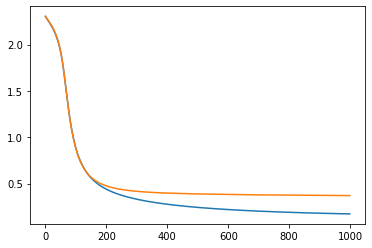

In [48]:
import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.plot(validate_loss)
plt.show()

# ReLU + Sigmoid + Cross Entropy + L2 + early stopping

In [49]:
# import EarlyStopping
from early_stopping import EarlyStopping

In [50]:
net2 = Net()
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr = 1e-1, weight_decay=1e-2)
loss_scores2, validate_loss2 = fit(net2, criterion2, optimizer2, True)

Validation loss decreased (inf --> 2.297760).  Saving model ...
Validation loss decreased (2.297760 --> 2.293224).  Saving model ...
Validation loss decreased (2.293224 --> 2.288750).  Saving model ...
Validation loss decreased (2.288750 --> 2.284319).  Saving model ...
Validation loss decreased (2.284319 --> 2.279920).  Saving model ...
Validation loss decreased (2.279920 --> 2.275534).  Saving model ...
Validation loss decreased (2.275534 --> 2.271152).  Saving model ...
Validation loss decreased (2.271152 --> 2.266778).  Saving model ...
Validation loss decreased (2.266778 --> 2.262383).  Saving model ...
Validation loss decreased (2.262383 --> 2.257947).  Saving model ...
Validation loss decreased (2.257947 --> 2.253465).  Saving model ...
Validation loss decreased (2.253465 --> 2.248921).  Saving model ...
Validation loss decreased (2.248921 --> 2.244309).  Saving model ...
Validation loss decreased (2.244309 --> 2.239632).  Saving model ...
Validation loss decreased (2.239632 -->

Validation loss decreased (0.729800 --> 0.722754).  Saving model ...
Validation loss decreased (0.722754 --> 0.715924).  Saving model ...
Validation loss decreased (0.715924 --> 0.709277).  Saving model ...
Validation loss decreased (0.709277 --> 0.702824).  Saving model ...
Validation loss decreased (0.702824 --> 0.696546).  Saving model ...
Validation loss decreased (0.696546 --> 0.690445).  Saving model ...
Validation loss decreased (0.690445 --> 0.684509).  Saving model ...
Validation loss decreased (0.684509 --> 0.678733).  Saving model ...
Validation loss decreased (0.678733 --> 0.673116).  Saving model ...
Validation loss decreased (0.673116 --> 0.667654).  Saving model ...
Validation loss decreased (0.667654 --> 0.662338).  Saving model ...
Validation loss decreased (0.662338 --> 0.657155).  Saving model ...
Validation loss decreased (0.657155 --> 0.652115).  Saving model ...
Validation loss decreased (0.652115 --> 0.647201).  Saving model ...
Validation loss decreased (0.64720

Validation loss decreased (0.448872 --> 0.448220).  Saving model ...
Validation loss decreased (0.448220 --> 0.447579).  Saving model ...
Validation loss decreased (0.447579 --> 0.446949).  Saving model ...
Validation loss decreased (0.446949 --> 0.446325).  Saving model ...
Validation loss decreased (0.446325 --> 0.445707).  Saving model ...
Validation loss decreased (0.445707 --> 0.445106).  Saving model ...
Validation loss decreased (0.445106 --> 0.444504).  Saving model ...
Validation loss decreased (0.444504 --> 0.443921).  Saving model ...
Validation loss decreased (0.443921 --> 0.443334).  Saving model ...
Validation loss decreased (0.443334 --> 0.442761).  Saving model ...
Validation loss decreased (0.442761 --> 0.442193).  Saving model ...
Validation loss decreased (0.442193 --> 0.441635).  Saving model ...
Validation loss decreased (0.441635 --> 0.441079).  Saving model ...
Validation loss decreased (0.441079 --> 0.440544).  Saving model ...
Validation loss decreased (0.44054

Validation loss decreased (0.408603 --> 0.408435).  Saving model ...
Validation loss decreased (0.408435 --> 0.408257).  Saving model ...
Validation loss decreased (0.408257 --> 0.408105).  Saving model ...
Validation loss decreased (0.408105 --> 0.407910).  Saving model ...
Validation loss decreased (0.407910 --> 0.407765).  Saving model ...
Validation loss decreased (0.407765 --> 0.407584).  Saving model ...
Validation loss decreased (0.407584 --> 0.407432).  Saving model ...
Validation loss decreased (0.407432 --> 0.407260).  Saving model ...
Validation loss decreased (0.407260 --> 0.407098).  Saving model ...
Validation loss decreased (0.407098 --> 0.406951).  Saving model ...
Validation loss decreased (0.406951 --> 0.406771).  Saving model ...
Validation loss decreased (0.406771 --> 0.406640).  Saving model ...
Validation loss decreased (0.406640 --> 0.406456).  Saving model ...
Validation loss decreased (0.406456 --> 0.406321).  Saving model ...
Validation loss decreased (0.40632

Validation loss decreased (0.395153 --> 0.395070).  Saving model ...
Validation loss decreased (0.395070 --> 0.395005).  Saving model ...
Validation loss decreased (0.395005 --> 0.394917).  Saving model ...
Validation loss decreased (0.394917 --> 0.394858).  Saving model ...
Validation loss decreased (0.394858 --> 0.394767).  Saving model ...
Validation loss decreased (0.394767 --> 0.394704).  Saving model ...
Validation loss decreased (0.394704 --> 0.394618).  Saving model ...
Validation loss decreased (0.394618 --> 0.394569).  Saving model ...
Validation loss decreased (0.394569 --> 0.394465).  Saving model ...
Validation loss decreased (0.394465 --> 0.394429).  Saving model ...
Validation loss decreased (0.394429 --> 0.394332).  Saving model ...
Validation loss decreased (0.394332 --> 0.394265).  Saving model ...
Validation loss decreased (0.394265 --> 0.394207).  Saving model ...
Validation loss decreased (0.394207 --> 0.394114).  Saving model ...
Validation loss decreased (0.39411

Validation loss decreased (0.388248 --> 0.388207).  Saving model ...
Validation loss decreased (0.388207 --> 0.388166).  Saving model ...
Validation loss decreased (0.388166 --> 0.388107).  Saving model ...
Validation loss decreased (0.388107 --> 0.388076).  Saving model ...
Validation loss decreased (0.388076 --> 0.388015).  Saving model ...
Validation loss decreased (0.388015 --> 0.387986).  Saving model ...
Validation loss decreased (0.387986 --> 0.387908).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.387908 --> 0.387824).  Saving model ...
Validation loss decreased (0.387824 --> 0.387806).  Saving model ...
Validation loss decreased (0.387806 --> 0.387742).  Saving model ...
Validation loss decreased (0.387742 --> 0.387710).  Saving model ...
Validation loss decreased (0.387710 --> 0.387654).  Saving model ...
Validation loss decreased (0.387654 --> 0.387621).  Saving model ...
Validation loss decreased (0.387621 --> 0.387564).  Saving model ...

Validation loss decreased (0.383556 --> 0.383535).  Saving model ...
Validation loss decreased (0.383535 --> 0.383501).  Saving model ...
Validation loss decreased (0.383501 --> 0.383474).  Saving model ...
Validation loss decreased (0.383474 --> 0.383440).  Saving model ...
Validation loss decreased (0.383440 --> 0.383394).  Saving model ...
Validation loss decreased (0.383394 --> 0.383384).  Saving model ...
Validation loss decreased (0.383384 --> 0.383332).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.383332 --> 0.383262).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.383262 --> 0.383196).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.383196 --> 0.383152).  Saving model ...
Validation loss decreased (0.383152 --> 0.383140).  Saving model ...
Validation loss decreased (0.383140 --> 0.383085).  Saving model ...
Validation loss decreased (0.383085 --> 0.383078).  Saving model ..

Validation loss decreased (0.379828 --> 0.379770).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.379770 --> 0.379725).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.379725 --> 0.379689).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.379689 --> 0.379655).  Saving model ...
Validation loss decreased (0.379655 --> 0.379630).  Saving model ...
Validation loss decreased (0.379630 --> 0.379624).  Saving model ...
Validation loss decreased (0.379624 --> 0.379575).  Saving model ...
Validation loss decreased (0.379575 --> 0.379564).  Saving model ...
Validation loss decreased (0.379564 --> 0.379533).  Saving model ...
Validation loss decreased (0.379533 --> 0.379510).  Saving model ...
Validation loss decreased (0.379510 --> 0.379493).  Saving model ...
Validation loss decreased (0.379493 --> 0.379461).  Saving model ...
Validation loss decreased (0.379461 --> 0.379447).  Saving model ..

EarlyStopping counter: 1 out of 20
Validation loss decreased (0.376699 --> 0.376667).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.376667 --> 0.376628).  Saving model ...
Validation loss decreased (0.376628 --> 0.376613).  Saving model ...
Validation loss decreased (0.376613 --> 0.376611).  Saving model ...
Validation loss decreased (0.376611 --> 0.376557).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.376557 --> 0.376506).  Saving model ...
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
Validation loss decreased (0.376506 --> 0.376466).  Saving model ...
EarlyStopping counter: 1 out of 20
Validation loss decreased (0.376466 --> 0.376428).  Saving model ...
EarlyStopping counter: 1 out of 20
Finished Training
